In [1]:
import MetaTrader5 as mt5
import pandas as pd
import time

# Initialize MT5 terminal
if not mt5.initialize():
    print("Failed to initialize MT5:", mt5.last_error())
else:
    
    account_number = 5030388664 
    password = "Hj*7ZaFj"  
    server = "MetaQuotes-Demo"  
    
    if mt5.login(account_number, password=password, server=server):
        print(f"Successfully logged into demo account {account_number}")
    else:
        error_code, error_message = mt5.last_error()
        print(f"Login failed. Error code: {error_code}, Message: {error_message}")

    # mt5.shutdown()


Successfully logged into demo account 5030388664


In [2]:
import time
import pandas as pd
import numpy as np
import pandas_ta as ta
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# data = pd.read_csv("15m_EURUSD.csv")
df= mt5.copy_rates_from_pos('EURUSD', mt5.TIMEFRAME_M5, 0, 10000)
data = pd.DataFrame(df)

# data.to_csv("M5_lg_EURUSD.csv")


# data['time'] = pd.to_datetime(data['time'], unit='s')
data['ATR'] = data.ta.atr(length=14)
data['RSI'] = data.ta.rsi()
data['Average'] = data.ta.midprice(length=1) #midprice
data['SMA_20'] = data.ta.sma(length=20)
data['SMA_50'] = data.ta.sma(length=50)
# data['MA100'] = data.ta.sma(length=100)

data.dropna(inplace=True)
# Find local maxima and minima
order = 1
max_idx = argrelextrema(data['high'].values, np.greater, order=order)[0]
min_idx = argrelextrema(data['low'].values, np.less, order=order)[0]

# Create signal labels
labels = np.zeros(len(data))  # Initialize with non-pivot labels
labels[max_idx] = 1  # Set labels for pivot highs (sell signal)
labels[min_idx] = 2  # Set labels for pivot lows (buy signal)
data['Signal'] = labels

# Shift the signal column to create the target for next pivot prediction
# data['Target'] = data['Signal'].shift(-order)

# Drop rows with NaN values (created by the shift operation)
# X = data.drop('time', axis=1)
data = data.drop('time', axis=1)

# features = ['High', 'Low', 'Close', 'ATR', 'SMA_20', 'SMA_50', 'RSI','Signal']
# X = data[features]


X = data.drop(['Signal'], axis=1)
y = data['Signal']

# data


# print(df)
labels[:50]

array([0., 0., 1., 0., 0., 0., 2., 1., 0., 1., 2., 0., 1., 0., 2., 0., 2.,
       1., 2., 0., 0., 1., 0., 0., 2., 0., 0., 1., 0., 0., 2., 0., 0., 2.,
       0., 1., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2.])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ) # random_state=42


In [4]:
model = RandomForestClassifier(n_estimators=100 )#, random_state=42 )
model.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [6]:
# print(y_pred)

# data['time'] = pd.to_datetime(data['time'], unit='s')

signal =  [*y_pred_train,*y_pred]

data["RFsignal"] = signal

data["RFsignal"] .value_counts()

# data
X_train

,open,high,low,close,tick_volume,spread,real_volume,ATR,RSI,Average,SMA_20,SMA_50
9181,1.08376,1.08394,1.08376,1.08391,152,4,0,0.000249,45.183528,1.083850,1.084183,1.084068
1103,1.10403,1.10417,1.10402,1.10415,135,4,0,0.000177,61.808003,1.104095,1.103918,1.103800
2744,1.11197,1.11198,1.11192,1.11197,29,4,0,0.000108,70.434072,1.111950,1.111653,1.111578
6882,1.09919,1.09932,1.09907,1.09916,173,4,0,0.000340,59.868315,1.099195,1.098698,1.098522
1565,1.10123,1.10139,1.10114,1.10131,40,15,0,0.000218,38.337450,1.101265,1.101591,1.101824
...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.11757,1.11778,1.11739,1.11764,79,3,0,0.000218,51.135141,1.117585,1.117561,1.117740
4540,1.11415,1.11425,1.11404,1.11425,92,4,0,0.000155,57.674449,1.114145,1.114066,1.113953
4959,1.11591,1.11600,1.11566,1.11583,240,4,0,0.000562,35.420342,1.115830,1.117104,1.117581
8072,1.09195,1.09213,1.09188,1.09188,121,4,0,0.000228,28.041456,1.092005,1.092504,1.092767


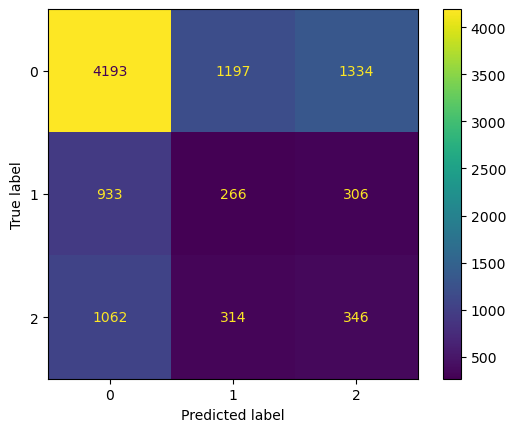

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(signal ,labels)  # specify labels for classes
dis = ConfusionMatrixDisplay(cm)
dis.plot()  # Optional: specify color map  cmap=plt.cm.Blues
plt.show()

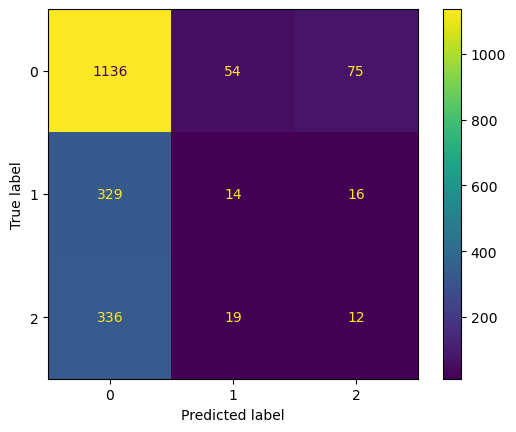

,open,high,low,close,tick_volume,spread,real_volume,ATR,RSI,Average,SMA_20,SMA_50,RFsignal
9535,1.08535,1.08540,1.08523,1.08532,154,4,0,0.000281,48.295456,1.085315,1.085474,1.085193,0.0
3228,1.11434,1.11444,1.11407,1.11428,205,3,0,0.000519,62.291781,1.114255,1.112959,1.113550,1.0
281,1.10933,1.10934,1.10923,1.10928,149,4,0,0.000296,46.632660,1.109285,1.109650,1.109002,0.0
1330,1.10271,1.10352,1.10270,1.10352,234,3,0,0.000232,80.345207,1.103110,1.102105,1.102075,1.0
3829,1.11240,1.11250,1.11217,1.11221,137,4,0,0.000338,42.969569,1.112335,1.112383,1.112791,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9843,1.08096,1.08117,1.08094,1.08094,233,4,0,0.000414,49.887673,1.081055,1.080717,1.081473,0.0
7194,1.09683,1.09692,1.09680,1.09686,109,4,0,0.000296,64.629748,1.096860,1.096173,1.096191,0.0
1873,1.10738,1.10739,1.10722,1.10728,44,4,0,0.000143,55.029324,1.107305,1.107280,1.107017,0.0
6078,1.10302,1.10365,1.10292,1.10346,238,4,0,0.000537,46.828367,1.103285,1.103716,1.103843,0.0


In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)  # specify labels for classes
dis = ConfusionMatrixDisplay(cm)
dis.plot()  # Optional: specify color map  cmap=plt.cm.Blues
plt.show()

X_test["RFsignal"] = y_pred
X_test

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))
print("Accuracy test: %.2f%%" % (accuracy * 100.0))

# print(df['signal'].value_counts()*100/df['signal'])

pred_test = np.random.choice([0,1,2],len(y_pred))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

Accuracy train: 100.00%
Accuracy test: 58.36%
Accuracy test: 58.36%
Accuracy Gambler: 33.10%


In [10]:
# X_train.rename(columns={'high': 'High', 'low': 'Low','open': 'Open', 'close': 'Close'}, inplace=True)
# X_train['time'] = pd.to_datetime(X_train['time'], unit='s')
# 
data.rename(columns={'high': 'High', 'low': 'Low','open': 'Open', 'close': 'Close'}, inplace=True)
# data['time'] = pd.to_datetime(X_train['time'], unit='s')


In [11]:
from backtesting import Strategy, Backtest
import numpy as np
import pandas as pd

class SmaCross(Strategy):
    size = 1000 # Size of each trade
    sl_coef = 0.01  # Coefficient for stop loss

    def init(self):
        pass

    def next(self):
        price = self.data["Close"][-1]
        atr = self.data["ATR"][-1]

        # long_sl = price * 0.997
        # long_tp = price * 1.03
        # short_sl = price * 1.007
        # short_tp = price * 0.97


        pip_value = 0.0001  # Standard pip value for most currency pairs

        # Adjust for JPY pairs
        # pip_value = 0.01  # Uncomment if trading JPY pairs

        pip_risk = 10 * pip_value  # 20 pips risk in price terms
        pip_risk = atr * 20 # 20 pips risk in price terms
        
        # Calculate new SL and TP levels based on 20 pips
        long_sl = price - pip_risk
        long_tp = price + pip_risk * 3  # For a 1:3 risk/reward ratio
        
        short_sl = price + pip_risk
        short_tp = price - pip_risk * 3 

        signal = self.data['Signal'][-1]

        # if signal == 2:  # Buy signal
        #     self.position.close()
        #     self.buy(sl=long_sl, tp=long_tp,size=self.size)
        # elif signal ==1:  # Sell signal
        #     self.position.close()
        #     self.sell(sl=short_sl, tp=short_tp,size=self.size)


        # if signal == 2:  # Buy signal
        #     self.position.close()
        #     self.buy(sl=long_sl, tp=long_tp) #,size=self.size
        # elif signal ==1:  # Sell signal
        #     self.position.close()
        #     self.sell(sl=short_sl, tp=short_tp) #,size=self.size
        

        if signal == 1: 
            self.position.close()
            self.buy()
        if signal == 2: 
            self.position.close()
            self.sell()

        # for trade in self.trades: 
        #             if trade.is_long: 
        #                 trade.sl = max(trade.sl or -np.inf, 
        #                             self.data["Close"][-1] * 0.98) 
        #             else: # short
        #                 trade.sl = min(trade.sl or np.inf, 
        #                             self.data["Close"][-1] * 1.02) 

       

bt = Backtest(data, SmaCross, cash=100000, commission=.001)
stats = bt.run()

print(stats)
bt.plot()


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\backtesting.py:1054: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  (data.index.is_numeric() and
C:\Users\Admin\AppData\Local\Temp\ipykernel_7956\2624142547.py:72: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(data, SmaCross, cash=100000, commission=.001)


Start                                    49.0
End                                    9999.0
Duration                               9950.0
Exposure Time [%]                   99.969852
Equity Final [$]                  1342.108586
Equity Peak [$]                      100000.0
Return [%]                         -98.657891
Buy & Hold Return [%]                -2.57585
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -98.658003
Avg. Drawdown [%]                  -98.658003
Max. Drawdown Duration                 9948.0
Avg. Drawdown Duration                 9948.0
# Trades                               3763.0
Win Rate [%]                         0.531491
Best Trade [%]                       0.233501
Worst Trade [%]                     -0.572716
Avg. Trade [%]                    

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1237', ...)

In [12]:
symbol = 'EURUSD'
rates = mt5.copy_rates_from_pos(symbol, mt5.TIMEFRAME_M1, 0, 100)

if rates is None:
    print(f"Failed to get rates for {symbol}")


def place_order(symbol, lot_size,signal):
        # lot_size = 0.1  # Specify the lot size
        # price = mt5.symbol_info_tick(symbol).ask# Get the ask price
        price = mt5.symbol_info_tick(symbol).ask  if signal == 'buy' else mt5.symbol_info_tick(symbol).bid
        entry = mt5.ORDER_TYPE_BUY if signal == 'buy' else mt5.ORDER_TYPE_SELL
        deviation = 50  # Specify the allowed deviation in points
        
        request = {
            "action": mt5.TRADE_ACTION_DEAL,
            "symbol": symbol,
            "volume": lot_size,
            "type": entry,
            "price": price,
            "deviation": deviation,
            # "magic": 30,  # Magic number for your EA
            "comment": "Automated trade",
            "type_time": mt5.ORDER_TIME_GTC,  # Good till cancelled
            # "type_filling": mt5.ORDER_FILLING_IOC,
        }
        
        # print(request)
        result = mt5.order_send(request)   
        # print(result)
    
        if result.retcode != mt5.TRADE_RETCODE_DONE:
            print(f"Order send failed, retcode: {result.retcode} {mt5.last_error()}")
        else:
            print(f"Order send succeeded: ok") # {result}")

        # time.sleep(60)


# Call this function based on your ML model signal
# place_buy_order(symbol, 0.1)




In [13]:
import time
def get_latest_candle(symbol, timeframe):
    rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, 100)
    data = pd.DataFrame(rates)
    data['time'] = pd.to_datetime(data['time'], unit='s')
    data['ATR'] = data.ta.atr(length=14)
    data['RSI'] = data.ta.rsi()
    data['Average'] = data.ta.midprice(length=1) #midprice
    data['SMA_20'] = data.ta.sma(length=20)
    data['SMA_50'] = data.ta.sma(length=50)
    data = data.drop("time",axis=True)
    # data = data.iloc[-1]
    # print(data)
    time.sleep(60)
    return data
# get_latest_candle("EURUSD", mt5.TIMEFRAME_M1)



In [14]:
model = RandomForestClassifier(n_estimators=100 )#, random_state=42 )
model.fit(X_train, y_train)

while True:
           
    X_new = get_latest_candle("EURUSD", mt5.TIMEFRAME_M1)
    y_pred = model.predict(X_new)
    
    
    if y_pred[0] != 0:
        signal = 'buy' if y_pred[0] == 1 else 'sell'
        place_order(symbol, 0.1, signal)
        print(signal)
        
    print(y_pred)
    # print(X_new)

    # time.sleep(60)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


KeyboardInterrupt: 

In [ ]:
# X_train.rename(columns={'high': 'High', 'low': 'Low','open': 'Open', 'close': 'Close'}, inplace=True)
# X_train['time'] = pd.to_datetime(X_train['time'], unit='s')

# data.rename(columns={'high': 'High', 'low': 'Low','open': 'Open', 'close': 'Close'}, inplace=True)
# data['time'] = pd.to_datetime(X_train['time'], unit='s')


In [ ]:
from backtesting import Strategy, Backtest
import numpy as np
import pandas as pd

class SmaCross(Strategy):
    size = 1000 # Size of each trade
    sl_coef = 0.01  # Coefficient for stop loss

    def init(self):
        pass

    def next(self):
        price = self.data["Close"][-1]
        atr = self.data["ATR"][-1]

        # long_sl = price * 0.997
        # long_tp = price * 1.03
        # short_sl = price * 1.007
        # short_tp = price * 0.97


        pip_value = 0.0001  # Standard pip value for most currency pairs

        # Adjust for JPY pairs
        # pip_value = 0.01  # Uncomment if trading JPY pairs

        pip_risk = 10 * pip_value  # 20 pips risk in price terms
        pip_risk = atr * 20 # 20 pips risk in price terms
        
        # Calculate new SL and TP levels based on 20 pips
        long_sl = price - pip_risk
        long_tp = price + pip_risk * 3  # For a 1:3 risk/reward ratio
        
        short_sl = price + pip_risk
        short_tp = price - pip_risk * 3 

        signal = self.data['Signal'][-1]

        # if signal == 2:  # Buy signal
        #     self.position.close()
        #     self.buy(sl=long_sl, tp=long_tp,size=self.size)
        # elif signal ==1:  # Sell signal
        #     self.position.close()
        #     self.sell(sl=short_sl, tp=short_tp,size=self.size)


        # if signal == 2:  # Buy signal
        #     self.position.close()
        #     self.buy(sl=long_sl, tp=long_tp) #,size=self.size
        # elif signal ==1:  # Sell signal
        #     self.position.close()
        #     self.sell(sl=short_sl, tp=short_tp) #,size=self.size
        

        if signal == 2: 
            self.position.close()
            self.buy()
        if signal == 1: 
            self.position.close()
            self.sell()

        # for trade in self.trades: 
        #             if trade.is_long: 
        #                 trade.sl = max(trade.sl or -np.inf, 
        #                             self.data["Close"][-1] * 0.98) 
        #             else: # short
        #                 trade.sl = min(trade.sl or np.inf, 
        #                             self.data["Close"][-1] * 1.02) 

       

bt = Backtest(data, SmaCross, cash=100000, commission=.001)
stats = bt.run()

print(stats)
bt.plot()
